# Chapter 6 Solutions

## Problem 6.3

The discrete version of the homogeneous wave equation

$\partial_t^2 s = \beta^2\, \partial_x^2 s$
is given in Eqn. 6.20 as 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \frac{\beta^2 (\Delta t)^2}{(\Delta x)^2} \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$


First let us define some parameters: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from copy import copy

In [2]:
L     = 100     # length of domain 
dx    = 0.1     # spatial discretiation
beta  = 1       # constant wavespeed


# Initial condition: 
def apply_initial_condition(x, s):
    """
    Applies initial condition defined in Eqn 6.21 
    x   1D numpy array of spatial positions (array x)
    s   1D numpy array of displacement variable (array s)
    """
    s = np.exp(-0.1 * (x-50)**2)
    return s 

We can create our grid of points, x, using a numpy array. Note that using L as our upper bound in the arange function produces an array of values up to L - dx, hence we use L+dx so that the last element of the array has value L:

In [7]:
# Create array x
x = np.arange(0, L+dx, dx)

# Length of array x
N = len(x)

Next we create an empty numpy array to hold the displacement values, with the same length as x: 

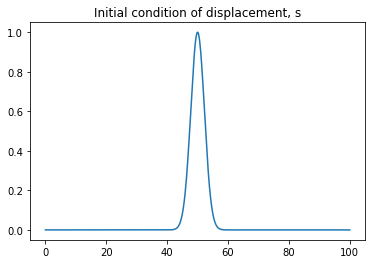

In [31]:
s      = np.zeros(N)
s_prev = np.zeros(N)

# Apply initial condition to s: 
s = apply_initial_condition(x,s)

# Plot initial condition
fig, ax = plt.subplots()
ax.set_title('Initial condition of displacement, s')
ax.plot(x,s)

### Timestepping

We can define a function that computes the displacement at timestep $n+1$ based on equation 6.20: 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \frac{\beta^2 (\Delta t)^2}{(\Delta x)^2} \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$

Note here that problem 6.3 requires us to investigate the effect of varying $a$, where 
$\Delta t = \alpha \Delta x / \beta $ which we can rearrange to
$\alpha = \beta \Delta t / \Delta x   $ such that we can write the timestepping condition equation in terms of $alpha$ as 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \alpha^2 \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$

In [32]:
def step_in_time(s, s_prev, alpha, use_Dirichlet_bc): 
    '''
    Function computes one timestep of s and applies the boundary 
    condition. 
    Inputs: 
    s       
       1D np array of displacement variable at timestep n
    s_prev  
       1D np array of displacement at timestep n-1
    alpha   
       float value defined in problem 
    use_Dirichlet_bc   
       boolean value, if True then applies Dirichlet bc
                      if False then applies Neumann bc
    
    Outputs: 
    s_new
       updated displacement at n+1 
    s
       displacement at time n which will be used as 's_prev in next timestep'          
    '''
    # Compute the first two terms of the equation
    # this applies to all elements in the array
    s_new = 2*s - s_prev
    
    # Now we add the 3rd term, which affects all elements of the
    # array except for the first and last elements (boundaries)
    s_new[1:-1] += (alpha**2)*( s[2:] - 2*s[1:-1] + s[:-2])
    
    
    # Apply boundary condition
    if use_Dirichlet_bc: 
        s_new[0]  = 0 
        s_new[-1] = 0 
    else: 
        # Neumann boundary condition
        s_new[0]  = s_new[1]
        s_new[-1] = s_new[-2]
    return s_new, s 

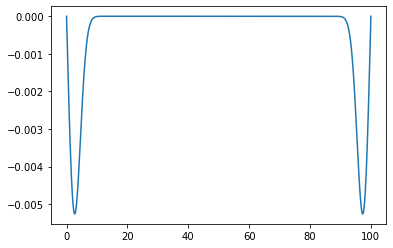

In [33]:
# To begin with let us assume that the initial condition holds for any time before 0, such that s_prev
# is the same as s 
s_prev = s 

alpha = 0.5

for i in range(1000):
    s, s_prev = step_in_time(s, s_prev, alpha, use_Dirichlet_bc=True)
    
fig, ax = plt.subplots()

ax.plot(x, s)


### Animation: 

We can animate, instead of plotting each timestep, but it requires a little bit extra code. 


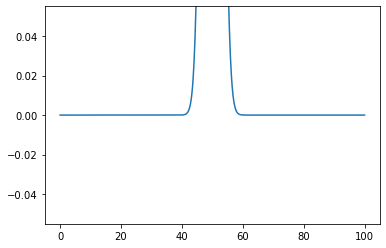

In [37]:
import matplotlib.animation as animation

# How animation starts at initial frame
def init():  
    s= np.zeros(N)
    s = apply_initial_condition(x,s)
    s_prev = s
    l.set_ydata(s)
    return l

# How animation updates
def animate(i):
    s, s_prev = step_in_time(s, s_prev, alpha, use_Dirichlet_bc=True)
    l.set_ydata(s)
    return l

fig, ax = plt.subplots()

s      = np.zeros(N)
l, = ax.plot(x,s)

# Define the animation loop
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=1000, blit=False, interval=500, repeat=True)

